In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv", index_col=0)
train_data = df.copy()

In [3]:
test = pd.read_csv('data/test.csv', index_col=0)

In [4]:
center_point = df[['c_1', 'c_2']].mean()
df['radius'] = np.sqrt((df['c_1'] - center_point['c_1'])**2 + (df['c_2'] - center_point['c_2'])**2)
df.head()

,c_1,c_2,m_1,m_2,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,...,mc_2,mc_3,mc_4,mc_5,mc_6,mc_7,mc_8,mc_9,TARGET,radius
ID,,,,,,,,,,,,,,,,,,,,,
0,-1.030832,0.852296,0.296590,0.961859,0.088141,0.367551,0.409911,0.413748,0.564725,0.809548,...,-0.676719,-0.696184,-0.342587,-2.504590,1.587297,-1.664303,0.623092,-0.040765,-0.002541,1.335895
1,-0.579073,0.726976,0.771023,-0.459303,0.497695,0.955265,0.059640,0.003631,0.918909,0.350725,...,0.737523,-0.640346,2.513343,2.263871,2.137233,-2.977946,0.301570,0.031460,0.006602,0.927484
2,0.247075,0.939711,0.788165,0.614665,0.904854,0.759019,0.473408,0.874605,0.184836,0.511990,...,-3.408861,-3.033708,0.405962,-0.667211,-0.082856,1.127740,-1.569627,-0.067948,-0.006384,0.969543
3,-0.484133,-1.058733,-0.255312,0.945397,0.386055,0.562933,0.054297,0.775500,0.976286,0.830746,...,0.202319,0.413482,1.160030,-2.419326,0.938661,-4.280382,-0.220232,1.016019,-0.001549,1.166106
4,-0.753558,-0.477875,1.460296,-0.377830,0.025013,0.685838,0.602755,0.357408,0.956214,0.913230,...,-1.048132,-0.564583,1.017124,-0.043037,1.024410,-0.338675,-0.084735,0.954277,0.001167,0.893281


In [5]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(linkage = 'single')
agc.fit(df[['m_1', 'm_2']])
agc.labels_

array([0, 1, 0, ..., 1, 0, 1])

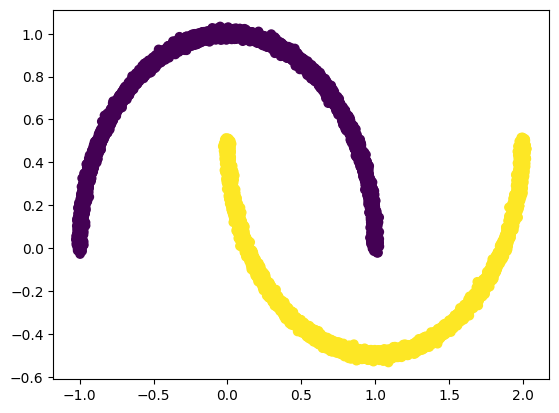

In [6]:
plt.scatter(df['m_1'], df['m_2'], c = agc.labels_, )


In [7]:
df['m_cluster'] = agc.labels_
df.head()


,c_1,c_2,m_1,m_2,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,...,mc_3,mc_4,mc_5,mc_6,mc_7,mc_8,mc_9,TARGET,radius,m_cluster
ID,,,,,,,,,,,,,,,,,,,,,
0,-1.030832,0.852296,0.296590,0.961859,0.088141,0.367551,0.409911,0.413748,0.564725,0.809548,...,-0.696184,-0.342587,-2.504590,1.587297,-1.664303,0.623092,-0.040765,-0.002541,1.335895,0
1,-0.579073,0.726976,0.771023,-0.459303,0.497695,0.955265,0.059640,0.003631,0.918909,0.350725,...,-0.640346,2.513343,2.263871,2.137233,-2.977946,0.301570,0.031460,0.006602,0.927484,1
2,0.247075,0.939711,0.788165,0.614665,0.904854,0.759019,0.473408,0.874605,0.184836,0.511990,...,-3.033708,0.405962,-0.667211,-0.082856,1.127740,-1.569627,-0.067948,-0.006384,0.969543,0
3,-0.484133,-1.058733,-0.255312,0.945397,0.386055,0.562933,0.054297,0.775500,0.976286,0.830746,...,0.413482,1.160030,-2.419326,0.938661,-4.280382,-0.220232,1.016019,-0.001549,1.166106,0
4,-0.753558,-0.477875,1.460296,-0.377830,0.025013,0.685838,0.602755,0.357408,0.956214,0.913230,...,-0.564583,1.017124,-0.043037,1.024410,-0.338675,-0.084735,0.954277,0.001167,0.893281,1


In [8]:
test['radius'] = np.sqrt((test['c_1'] - center_point['c_1'])**2 + (test['c_2'] - center_point['c_2'])**2)
agc = AgglomerativeClustering(linkage = 'single')
agc.fit(test[['m_1', 'm_2']])
test['m_cluster'] = agc.labels_
test.head()

,c_1,c_2,m_1,m_2,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,...,mc_2,mc_3,mc_4,mc_5,mc_6,mc_7,mc_8,mc_9,radius,m_cluster
ID,,,,,,,,,,,,,,,,,,,,,
0,0.453135,0.631948,0.946726,0.284150,0.390982,0.993040,0.858435,0.025059,0.016954,0.440202,...,2.606183,-0.385630,0.306463,-3.454732,0.659152,-1.049579,-1.646701,-0.755683,0.775952,0
1,-0.446105,-0.206687,1.225122,-0.472673,0.590084,0.682606,0.121248,0.085474,0.575945,0.362193,...,-0.059189,0.531227,-1.456298,0.197297,-3.631915,3.482724,0.220615,-1.253722,0.492359,1
2,-0.929768,-0.236726,-0.211991,0.983287,0.255440,0.997218,0.185513,0.495543,0.409448,0.371395,...,1.130395,-0.979486,-2.604229,-0.685552,-0.519991,3.175169,0.125237,0.999117,0.959719,0
3,1.087014,0.474569,0.971476,0.265174,0.904335,0.440854,0.601088,0.443708,0.607987,0.893845,...,-1.059669,0.314280,3.216311,1.777331,2.378461,-4.346591,-0.402699,1.677564,1.185449,0
4,-1.286852,-0.550938,-0.155366,0.980676,0.517972,0.875242,0.706647,0.114120,0.363096,0.052569,...,1.873623,-0.137316,0.464656,-2.001316,1.723290,-0.734778,1.078520,-1.471971,1.400461,0


In [9]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'X' is your feature data (NumPy array or Pandas DataFrame)
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
X = scaler.fit_transform(X)

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'X' is your feature data (NumPy array or Pandas DataFrame)
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
test = scaler.fit_transform(test)

In [12]:
test = pd.DataFrame(test)

In [13]:
X = pd.DataFrame(X)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from lightgbm import LGBMRegressor
n_folds = 15
weights = []
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
train_data = X
train_target = y

estimator = LGBMRegressor(boosting_type='goss', num_leaves=60, learning_rate=0.1,max_depth=12, n_estimators=400)
selector = RFE(estimator, n_features_to_select=44, step=1)
selector.fit(train_data, train_target)
rfe_train_data = train_data.iloc[:, selector.support_]
test_data = test.iloc[:, selector.support_]
test_preds = np.zeros((test_data.shape[0],))

for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    X_train, y_train = rfe_train_data.iloc[train_idx], train_target[train_idx]
    X_val, y_val = rfe_train_data.iloc[val_idx], train_target[val_idx]

    model = LGBMRegressor(boosting_type='goss', num_leaves=60, learning_rate=0.1,max_depth=12, n_estimators=400)
  # Use SVR instead of Linear Regression
    model.fit(X_train, y_train)

    val_preds = model.predict(X_val)
    fold_rmse = mean_squared_error(y_val, val_preds, squared=False)
    weights.append(1 / fold_rmse)
    print(f'Fold {fold+1} RMSE: {fold_rmse}')
    test_preds += model.predict(test_data) * weights[fold]
test_preds /= sum(weights)

print(test_preds)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10967
[LightGBM] [Info] Number of data points in the train set: 35000, number of used features: 44
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 0.000025
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=gos

In [ ]:
result = pd.DataFrame(columns=['ID', 'TARGET'])
result['ID'] = test.index
result['TARGET'] = test_preds
result.to_csv('data/submissionlgbm3.csv', index=False)